# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will use the dataset 'Healthcare For All' building a model to predict who will donate (TargetB) and how much they will give (TargetD) (will be used for lab on Friday). You will be using `files_for_lab/learningSet.csv` file which you have already downloaded from class.

### Scenario

You are revisiting the Healthcare for All Case Study. You are provided with this historical data about Donors and how much they donated. Your task is to build a machine learning model that will help the company identify people who are more likely to donate and then try to predict the donation amount.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in the class.  You should continue in the same notebook from Monday.

Here is the list of steps to be followed (building a simple model without balancing the data):


**These steps should have been completed in Monday's labs:**
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `donors`.
- Check the datatypes of all the columns in the data. 
- Split the data into numerical and catagorical.
- Check for null values in the dataframe. Replace the null values using the methods learned in class.
- Treat the data using techniques learned in class.
 

**Begin the Modeling here**
- Look critically at the dtypes of numerical and categorical columns and make changes where appropriate.
- Concatenate numerical and categorical back together again for your X dataframe.  Designate the TargetB as y.
  - Split the data into a training set and a test set.
  - Split further into train_num and train_cat.  Also test_num and test_cat.
  - Scale the features either by using MinMax Scaler or a Standard Scaler. (train_num, test_num)
  - Encode the categorical features using One-Hot Encoding or Ordinal Encoding.  (train_cat, test_cat)
      - **fit** only on train data, transform both train and test
      - again re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model has changed.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
numerical = pd.read_pickle('numerical.pkl')
categorical = pd.read_pickle('categorical.pkl')
targets = pd.read_pickle('targets.pkl')

In [3]:
numerical.shape

(95412, 318)

In [4]:
categorical.shape

(95412, 10)

In [5]:
targets

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [6]:
targets.TARGET_B.value_counts()
# 1 = people who donated
# 0 = people who didn't donate

0    90569
1     4843
Name: TARGET_B, dtype: int64

First we check for the best features we could keep with the variance method

In [7]:
# first we scale the numerical
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [8]:
# then we check the column that have less than 20% variance
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

sel = sel.fit(numerical_scaled) 
temp = sel.transform(numerical_scaled) 
temp = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp.shape)

(95412, 318)
(95412, 80)


In [9]:
var_list = list(sel.get_support())
list(zip(numerical.columns, var_list))

[('ODATEDW', True),
 ('TCODE', False),
 ('DOB', True),
 ('AGE', True),
 ('INCOME', True),
 ('WEALTH1', True),
 ('HIT', False),
 ('MALEMILI', False),
 ('MALEVET', False),
 ('VIETVETS', True),
 ('WWIIVETS', True),
 ('LOCALGOV', False),
 ('STATEGOV', False),
 ('FEDGOV', False),
 ('WEALTH2', True),
 ('POP901', False),
 ('POP902', False),
 ('POP903', False),
 ('POP90C1', True),
 ('POP90C2', True),
 ('POP90C3', True),
 ('POP90C4', False),
 ('POP90C5', False),
 ('ETH1', True),
 ('ETH2', True),
 ('ETH3', False),
 ('ETH4', False),
 ('ETH5', False),
 ('ETH6', False),
 ('ETH7', False),
 ('ETH8', False),
 ('ETH9', False),
 ('ETH10', False),
 ('ETH11', False),
 ('ETH12', False),
 ('ETH13', False),
 ('ETH14', False),
 ('ETH15', False),
 ('ETH16', False),
 ('AGE901', False),
 ('AGE902', False),
 ('AGE903', False),
 ('AGE904', False),
 ('AGE905', False),
 ('AGE906', False),
 ('AGE907', False),
 ('CHIL1', False),
 ('CHIL2', False),
 ('CHIL3', False),
 ('AGEC1', False),
 ('AGEC2', False),
 ('AGEC3', Fal

In [10]:
drop_list = [col[0] for col in zip(numerical.columns, var_list) if col[1] == False]

In [11]:
len(drop_list)

238

In [12]:
numerical = numerical.drop(drop_list, axis=1)

In [13]:
numerical.head()

,ODATEDW,DOB,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,LASTDATE,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,3712,60.000000,4.0,6.0,34,18,5.0,0,35,65,92,1,49,97,95,2,0,0,479,635,3,2,86,14,7,80,70,84,50,2,7,13,27,47,0,61,0,0,0,2,5,17,73,13,51,46,54,13,45,64,64,62,53,99,0,34,18,74,88,77,31,14,14,31,54,46,90,10,33,65,40,6,2,27,9512,95515,0,4,39.0
1,9401,5202,46.000000,6.0,9.0,55,11,9.0,99,0,0,67,0,75,99,99,0,0,0,5468,5218,12,10,96,4,9,94,88,95,44,97,98,98,98,99,94,83,0,0,0,91,91,91,94,2,66,56,44,2,71,83,81,64,57,99,99,55,11,39,50,92,10,26,56,97,99,0,96,4,99,0,99,20,4,12,9512,148535,0,2,1.0
2,9001,0,61.611649,3.0,1.0,29,33,1.0,0,2,98,96,2,44,69,69,6,5,3,497,546,2,1,78,22,18,76,65,86,60,0,1,6,18,50,0,36,2,24,3,0,2,9,44,32,31,38,62,21,61,73,70,78,62,82,99,28,32,84,96,65,22,12,23,50,69,31,0,35,22,77,17,9,2,26,9512,15078,1,4,60.0
3,8701,2801,70.000000,1.0,4.0,14,31,0.0,0,8,92,61,0,50,85,83,4,1,0,1000,1263,2,1,48,52,6,73,61,84,36,10,25,50,69,92,10,42,0,9,0,1,8,17,34,27,26,46,54,17,43,81,68,33,31,0,99,14,31,67,56,43,38,10,19,39,45,55,45,17,23,77,22,16,2,27,9512,172556,1,4,41.0
4,8601,2001,78.000000,3.0,2.0,9,53,5.0,99,0,0,2,98,57,99,98,0,0,0,576,594,4,3,90,10,0,82,49,92,1,0,1,2,16,67,0,45,0,0,0,25,58,74,83,24,11,20,80,1,76,73,65,80,31,81,99,9,53,65,99,45,34,1,3,6,33,67,9,72,99,1,21,6,2,43,9601,7112,1,2,26.0


In [14]:
df = pd.concat((targets['TARGET_B'], categorical, numerical),axis=1)

In [15]:
df.head()

,TARGET_B,STATE,MAILCODE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEDW,DOB,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,LASTDATE,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,IL,A,36,U,F,0,E,C,T,2,8901,3712,60.000000,4.0,6.0,34,18,5.0,0,35,65,92,1,49,97,95,2,0,0,479,635,3,2,86,14,7,80,70,84,50,2,7,13,27,47,0,61,0,0,0,2,5,17,73,13,51,46,54,13,45,64,64,62,53,99,0,34,18,74,88,77,31,14,14,31,54,46,90,10,33,65,40,6,2,27,9512,95515,0,4,39.0
1,0,CA,A,14,H,M,3,G,A,S,1,9401,5202,46.000000,6.0,9.0,55,11,9.0,99,0,0,67,0,75,99,99,0,0,0,5468,5218,12,10,96,4,9,94,88,95,44,97,98,98,98,99,94,83,0,0,0,91,91,91,94,2,66,56,44,2,71,83,81,64,57,99,99,55,11,39,50,92,10,26,56,97,99,0,96,4,99,0,99,20,4,12,9512,148535,0,2,1.0
2,0,NC,A,43,U,M,3,E,C,R,2,9001,0,61.611649,3.0,1.0,29,33,1.0,0,2,98,96,2,44,69,69,6,5,3,497,546,2,1,78,22,18,76,65,86,60,0,1,6,18,50,0,36,2,24,3,0,2,9,44,32,31,38,62,21,61,73,70,78,62,82,99,28,32,84,96,65,22,12,23,50,69,31,0,35,22,77,17,9,2,26,9512,15078,1,4,60.0
3,0,CA,A,44,U,F,3,E,C,R,2,8701,2801,70.000000,1.0,4.0,14,31,0.0,0,8,92,61,0,50,85,83,4,1,0,1000,1263,2,1,48,52,6,73,61,84,36,10,25,50,69,92,10,42,0,9,0,1,8,17,34,27,26,46,54,17,43,81,68,33,31,0,99,14,31,67,56,43,38,10,19,39,45,55,45,17,23,77,22,16,2,27,9512,172556,1,4,41.0
4,0,FL,A,16,H,F,3,F,A,S,2,8601,2001,78.000000,3.0,2.0,9,53,5.0,99,0,0,2,98,57,99,98,0,0,0,576,594,4,3,90,10,0,82,49,92,1,0,1,2,16,67,0,45,0,0,0,25,58,74,83,24,11,20,80,1,76,73,65,80,31,81,99,9,53,65,99,45,34,1,3,6,33,67,9,72,99,1,21,6,2,43,9601,7112,1,2,26.0


In [16]:
df.shape

(95412, 91)

### Split the data into a training set and a test set.

In [86]:
y = df['TARGET_B']
X = df.drop(['TARGET_B'], axis=1)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Split further into train_num and train_cat. Also test_num and test_cat.
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)

X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [89]:
# Scale the features either by using MinMax Scaler or a Standard Scaler. (train_num, test_num)
transformer = MinMaxScaler().fit(X_train_num)

X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

In [90]:
# Encode the categorical features using One-Hot Encoding or Ordinal Encoding. (train_cat, test_cat)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols) 

cols = encoder.get_feature_names_out(input_features=X_test_cat.columns) 
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols) 

In [91]:
X_train_transformed = np.concatenate([X_train_norm, X_train_encode], axis=1)


In [92]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(X_train_transformed, y_train)

/Users/damiencombe/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
X_test_transformed = np.concatenate([X_test_norm, X_test_encode], axis=1)


In [94]:
# Check the accuracy on the test data.

predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.9487501965099827

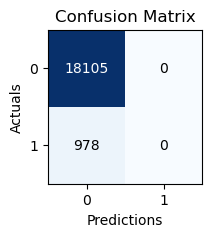

In [95]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix=confusion_matrix(y_test, predictions)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,figsize=(2, 2), cmap=plt.cm.Blues)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

### Managing imbalance in the dataset

In [96]:
# Check for the imbalance
y.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [97]:
# for downsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train, y_train], axis=1)
# we downsample where target_b = 0 on target_b = 1
category_0 = trainset[trainset['TARGET_B']==0].sample(len(trainset[trainset['TARGET_B']==1]))
print(category_0.shape)


category_1 = trainset[trainset['TARGET_B']== 1 ]
print(category_1.shape)

# we concat the both new balanced target_b
trainset_new = pd.concat([category_0, category_1], axis = 0)

# we randomize the rows
trainset_new = trainset_new.sample(frac =1) 
X_train_down = trainset_new.drop(['TARGET_B'], axis=1)
y_train_down = trainset_new['TARGET_B']
print(X_train.shape)

(3865, 91)
(3865, 91)
(76329, 90)


In [98]:
X_train_num = X_train_down.select_dtypes(include = np.number)
X_train_cat = X_train_down.select_dtypes(include = object)


In [99]:
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [100]:
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

In [101]:
X_train_transformed = np.concatenate([X_train_norm, X_train_encode], axis=1)


In [102]:
classification.fit(X_train_transformed, y_train_down)

/Users/damiencombe/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.5841324739296756

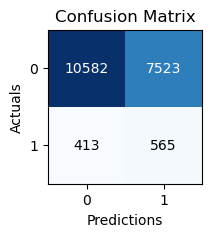

In [104]:
conf_matrix=confusion_matrix(y_test, predictions)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,figsize=(2, 2), cmap=plt.cm.Blues)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

In [105]:
# for upsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train, y_train], axis=1)

from sklearn.utils import resample

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [106]:
category_1_oversampled = resample(category_1,
                                  replace=True,
                                  n_samples = len(category_0))

In [107]:
print(category_0.shape)
print(category_1_oversampled.shape)

(72464, 91)
(72464, 91)


In [108]:
trainset_new = pd.concat([category_0, category_1_oversampled], axis = 0)


In [109]:
trainset_new = trainset_new.sample(frac =1) 
X_train_up = trainset_new.drop(['TARGET_B'], axis=1)
y_train_up = trainset_new['TARGET_B']
print(X_train_up.shape)

(144928, 90)


In [110]:
X_train_num = X_train_up.select_dtypes(include = np.number)
X_train_cat = X_train_up.select_dtypes(include = object)

In [111]:
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [112]:
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

In [113]:
X_train_transformed = np.concatenate([X_train_norm, X_train_encode], axis=1)


In [114]:
classification.fit(X_train_transformed, y_train_up)

/Users/damiencombe/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.6122727034533354

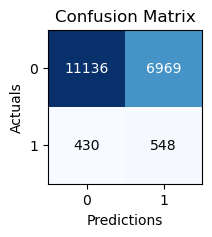

In [116]:
conf_matrix=confusion_matrix(y_test, predictions)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,figsize=(2, 2), cmap=plt.cm.Blues)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()